<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right"> 

<h1 align=left><font size = 8, style="color:rgb(200,0,0)"><b>Ciência de Dados </b></font></h1> 
<h1 align=left><font size = 5, style="color:rgb(0,0,0)"><b>Paradigmas de Linguagens de
Programação para Ciência de Dados</b></font></h1> 

# 4 Estudos de Caso de Análise de Dados I
Professores: *Diego Nogare* & *Rogério de Oliveira* 

<br>
<br>

---


# Exercícios

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# WHO World Health Organization

Os dados abaixo foram obtidos diretamente da Organização Mundial de Saúde. Empregue os dados de 2015 já selecionados abaixo para responder as perguntas.

In [89]:
WHO = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/Life_Expectancy_Data.csv')
WHO.rename(columns={' BMI ':'BMI', 'Life expectancy ':'Life_expectancy'}, inplace=True)
WHO = WHO[ WHO.Year == 2015 ]
print(WHO.head())
display(WHO.shape)

                Country  Year  ... Income composition of resources  Schooling
0           Afghanistan  2015  ...                           0.479       10.1
16              Albania  2015  ...                           0.762       14.2
32              Algeria  2015  ...                           0.743       14.4
48               Angola  2015  ...                           0.531       11.4
64  Antigua and Barbuda  2015  ...                           0.784       13.9

[5 rows x 22 columns]


(183, 22)

# Qualidade dos Dados

Verifique a Qualidade dos Dados. Quantos atributos apresentam dados ausentes a qual atributo tem o maior percentual de dados ausentes?

In [90]:
# Seu código
# Atributos com dados ausentes
dados_ausentes = WHO.isnull().sum()
print(dados_ausentes)

Country                              0
Year                                 0
Status                               0
Life_expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            177
percentage expenditure               0
Hepatitis B                          9
Measles                              0
BMI                                  2
under-five deaths                    0
Polio                                0
Total expenditure                  181
Diphtheria                           0
 HIV/AIDS                            0
GDP                                 29
Population                          41
 thinness  1-19 years                2
 thinness 5-9 years                  2
Income composition of resources     10
Schooling                           10
dtype: int64


In [91]:
# Percentual de dados ausentes
dados_ausentes_percentual = (dados_ausentes / len(WHO))*100

In [92]:
# Atributo com o maior pecentual de dados ausentes
print(dados_ausentes_percentual.nlargest(1))

Total expenditure    98.907104
dtype: float64


O atributo com maior percentual de dados ausentes é o 'Total expenditure' com 98,9% de dados ausentes.

# Qualidade dos Dados

Alguns países estão classificados como países *em desenvolvimento* e parecem destoar do nosso entendimento geral de países *desenvolvidos $\times$ em desenvolvimento*. Quais dois países parecem se enquadrar neste caso?

(Dica: verifique os países em desenvolvimento que apresentam um GDP que discrepante dos demais)
<br>

In [93]:
# Seu código
desenvolvidos = WHO[WHO['Status'] == 'Developed']
em_desenvolvimento = WHO[WHO['Status'] == 'Developing']

In [94]:
# Média da GDP dos países desenvolvidos
desenv_gdp_media = desenvolvidos.GDP.mean()
display(desenv_gdp_media)

16434.95783475

In [101]:
# Países em desenvolvimento que apresentam GDP discrepante
em_desenv_acima_media = em_desenvolvimento[['Country', 'Status', 'GDP']]
em_desenv_acima_media = em_desenv_acima_media[em_desenv_acima_media['GDP'] > 
                                              desenv_gdp_media]
display(em_desenv_acima_media.nlargest(2,'GDP'))

,Country,Status,GDP
2071,Qatar,Developing,66346.52267
496,Canada,Developing,43315.74400


Os dois países que parecem desenquadrar do entendimento de 'em desenvolvimento' são Qatar e Canadá. Ambos apresentam GDP acima da média dos países desenvolvidos (16434.95), lembrando que estes dois não são os únicos acima dessa média como podemos observar abaixo.

In [104]:
print(em_desenv_acima_media)

                  Country      Status          GDP
176               Bahrain  Developing  22688.87824
496                Canada  Developing  43315.74400
930                France  Developing  36526.77110
1266               Israel  Developing  35729.37253
1394               Kuwait  Developing  28975.41800
1926                 Oman  Developing  16627.36433
2071                Qatar  Developing  66346.52267
2649  Trinidad and Tobago  Developing  17321.83373


# Distribuição dos Dados

Analise a Distribuição da Expectativa de Vida entre os países Desenvolvidos e em Desenvolvimento. O que você consegue afirmar sobre essas distribuições? 

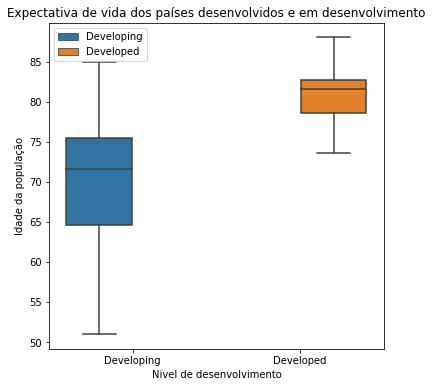

In [97]:
# Seu código
plt.figure(figsize=(6,6))
sns.boxplot(data = WHO, y = 'Life_expectancy', x = 'Status', hue = 'Status', )
plt.title("Expectativa de vida dos países desenvolvidos e em desenvolvimento")
plt.ylabel("Idade da população")
plt.xlabel("Nivel de desenvolvimento")
plt.legend()
plt.show()

Através do gráfico boxplot acima, é possível observar que a expectativa de vida dos países desenvolvidos é maior que a dos em desenvolvimento. Mais da metade da população dos países desenvolvidos tem expectativa de vida superior a 83 anos enquanto que nos países em desenvolvimento a expectativa cai para 72 anos.<br>
É possível observar também que a menor expectativa de vida dos países desenvolvidos é de aproximadamente 74 anos contra aproximadamente 51 para os países em desenvolvimento.

# Relações

Quais índices aparecem como mais correlacionados a Expectativa de Vida dos países em Desenvolvimento?  

In [103]:
# Seu código
# Limpando as colunas com maior percentual de dados faltantes
em_desenvolvimento_sem_nan = em_desenvolvimento.drop(labels = ['Total expenditure', 'Alcohol'] , axis = 1)

# 5 índices mais correlacionados com a Expectativa de vida dos países em desenvolvimento
em_desenvolvimento_sem_nan.corr().nsmallest(5, 'Life_expectancy')


,Year,Life_expectancy,Adult Mortality,infant deaths,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Adult Mortality,NaN,-0.742151,1.000000,0.157308,-0.062994,-0.203375,0.023442,-0.321384,0.181675,-0.321929,-0.268184,0.611221,-0.294645,0.054482,0.182728,0.186516,-0.593227,-0.467203
HIV/AIDS,NaN,-0.618896,0.611221,0.073787,-0.044982,-0.386339,-0.043191,-0.272889,0.100476,-0.376749,-0.417233,1.000000,-0.179452,0.025707,0.124926,0.106917,-0.464850,-0.370858
thinness 1-19 years,NaN,-0.357243,0.182728,0.527482,-0.032946,-0.012641,0.339449,-0.434003,0.516928,-0.122649,-0.035203,0.124926,-0.174327,0.009252,1.000000,0.968766,-0.397311,-0.404424
thinness 5-9 years,NaN,-0.354700,0.186516,0.528042,-0.031514,-0.058313,0.334329,-0.453891,0.516203,-0.124133,-0.082006,0.106917,-0.186879,-0.000840,0.968766,1.000000,-0.392325,-0.396900
under-five deaths,NaN,-0.246718,0.181675,0.994112,-0.019978,-0.095642,0.763575,-0.226352,1.000000,-0.122485,-0.113145,0.100476,-0.114254,0.325293,0.516928,0.516203,-0.198389,-0.201748


Os índices que mais se correlacionam com a expectativa de vida nos países em desenvolvimento são:
mortalidade de adultos, HIV/AIDS, magreza/fome nas idades de 1 a 19 anos e de 5 a 9 anos e a mortalidade de crianças com menos de 5 anos.

# Ranking

Qual a posição do Brasil no Ranking de Escolaridade (`Schooling`) com relação aos demais países? 

In [99]:
# Seu código
# Selecionando um dataframe com as colunas país e escolaridade
em_desenv_escolaridade = WHO[['Country', 'Schooling']]

# Excluindo linhas com dados ausentes
em_desenv_escolaridade = em_desenv_escolaridade.dropna()

# Reordenando os dados, mais escolarizados primeiro
numero_paises = len(em_desenv_escolaridade)
em_desenv_escolaridade = em_desenv_escolaridade.nlargest(numero_paises, 'Schooling')

# Reindexando a série para que o índice também seja a posição do país 
posicao = np.array(range(1, numero_paises + 1))
em_desenv_escolaridade.set_index(keys = posicao, inplace = True)
display(em_desenv_escolaridade)

,Country,Schooling
1,Australia,20.4
2,Denmark,19.2
3,New Zealand,19.2
4,Iceland,19.0
5,Ireland,18.6
...,...,...
169,Central African Republic,7.1
170,Djibouti,6.3
171,Niger,5.4
172,Eritrea,5.0


In [100]:
# Encontrando o Brazil (com Z pois os dados estão em inglês)
display(em_desenv_escolaridade[em_desenv_escolaridade['Country'] == 'Brazil'])

,Country,Schooling
40,Brazil,15.2


O Brasil está na 40ª posição em nível de escolaridade levando em consideração 
todos os países presentes nestes dados.